1.4142135623730951
7.071067811865475


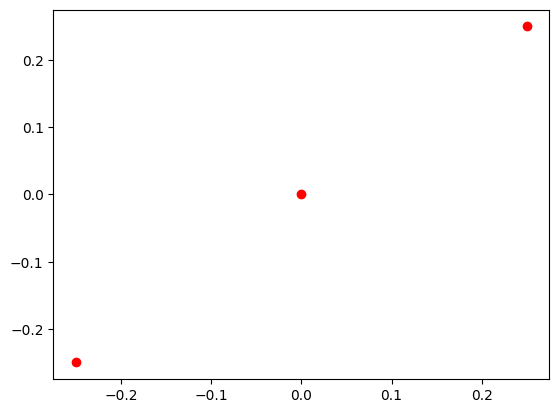

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import random


test_3_charges = [[0,0],[-0.25,-0.25],[0.25,0.25]]
for iq in test_3_charges:
    plt.plot(iq[0],iq[1],'ro')

def calcDistanceBetweenTwoPoints(pos1,pos2):
    x1=pos1[0]
    y1=pos1[1]
    x2=pos2[0]
    y2=pos2[1]
    dist = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

testpos1=[1,1]
testpos2 = [0,0]
print(calcDistanceBetweenTwoPoints(testpos1,testpos2))


def calcPotentialEnergy(chargeConfig, rn=1):
    Utot=0

    for i in range(len(chargeConfig)):

        for j in range(i+1, len(chargeConfig)):

            dist_ij= calcDistanceBetweenTwoPoints(chargeConfig[i],chargeConfig[j])

            Utot = Utot + 1/dist_ij**rn
    return Utot


U1 = calcPotentialEnergy(test_3_charges)
print(U1)




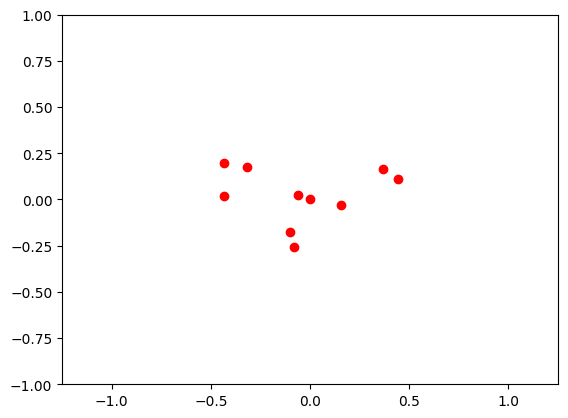

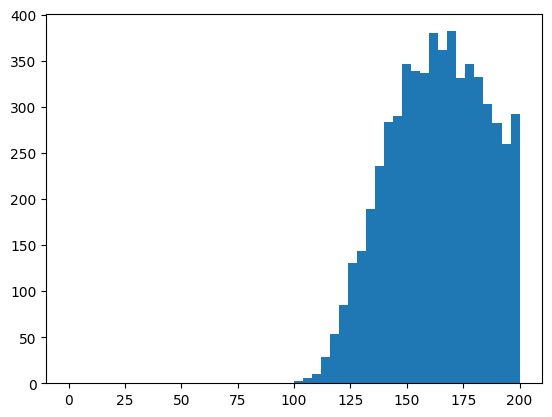

Mean pot energy =  211.63936841168186
Best (minimum) U from random samples = 102.86717013380861
Corresponding config is:


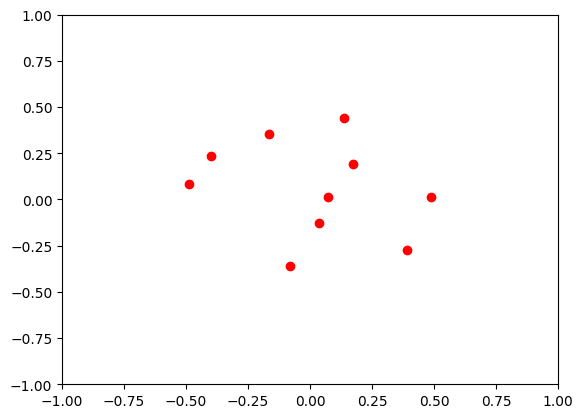

In [46]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


def distributeNRandomlyInCircle(N,R=0.5):
    points=[]
    for i in range(N):
        
        ri= random.uniform(0,R)
        itheta = random.uniform(0,2*math.pi)

        xi=ri*math.cos(itheta)
        yi=ri*math.sin(itheta)
        points.append([xi,yi])
    return points

test1 = distributeNRandomlyInCircle(10)
#print(test1)


for iq in test1:
    plt.plot(iq[0],iq[1],'ro')

plt.xlim(-1.25,+1.25)
plt.ylim(-1,+1)
plt.show()

# U Energy

best_config = []
bestU = 1e6
N_test = 10
U_random = []
for i in range(10000):
    ipoints = distributeNRandomlyInCircle(N_test)
    Ui = calcPotentialEnergy(ipoints)
    U_random.append(Ui)
    
    if(Ui<bestU):
        bestU=Ui
        best_config = ipoints


plt.hist(U_random,50,(0,200)) 
plt.show()


print("Mean pot energy = ",np.mean(U_random))
print("Best (minimum) U from random samples =",bestU)
print("Corresponding config is:")
for iq in best_config:
    plt.plot(iq[0],iq[1],'ro')

plt.xlim(-1,+1)
plt.ylim(-1,+1)
plt.show()


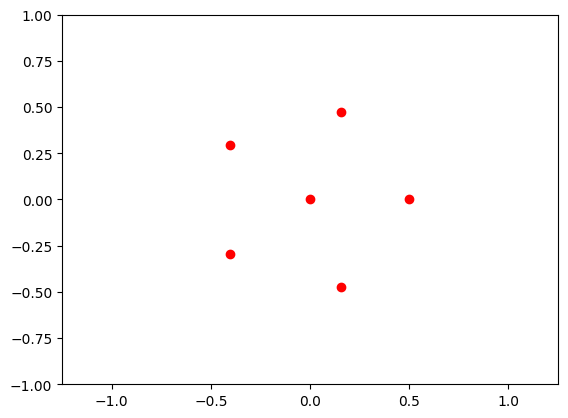

U5: 5-circ =  13.763819204711735
U5: 4-circ, 1 ctr =  23.763819204711734


In [47]:
def distributeNAroundCircle(N,R=0.5,offset=0):
    points=[]  
    interval = 2*math.pi/N
    for i in range(N):
        thetai = offset+ (i*interval)
        xi = R*math.cos(thetai)
        yi = R*math.sin(thetai)
        points.append([xi,yi])  
    return points


charges_5_circ = distributeNAroundCircle(5)

charges_4_circ =  distributeNAroundCircle(5)
center = [0,0]
charges_5_ctr = charges_4_circ
charges_5_ctr.append(center)


for iq in charges_5_ctr:
    plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)
plt.xlim(-1.25,+1.25)
plt.ylim(-1,+1)
plt.show()

U5a = calcPotentialEnergy(charges_5_circ)
U5b = calcPotentialEnergy(charges_5_ctr)
print("U5: 5-circ = ",U5a)
print("U5: 4-circ, 1 ctr = ",U5b)

## Activity: Explore Circular/Central Arrangements for Different N

Using the code above as an example, you should now explore values of N from N=5 to N=13
For each N, consider the two cases where (a) all N points are arranged equally around the circumference of the circle; (b) N-1 are arranged equally around the circumference, and 1 point is in the center

Find the potential energy of these two configurations for each N, and compare them. 
(As a cross-check, you should find that the configuration with lowest potential energy for N=10 has U=38.62
and that for N=11, the lowest energy configuration has U=48.57)

For small values of N, you should find that the arrangement with all N around the circumference has the lower energy, but this will change at a certain point. 
At what value of N do you find that the lowest-energy configuration corresponds to having 1 point in the center and N-1 around the circumference?

How does this N value compare to what you found from your previous experimental measurements?

<br>
<span style="color:red;font-weight:bold;">
After you have completed this activity, it's a good idea check in with the instructor/TA before proceeding. 
</span>

5 Udiff:  -1.8930350447806443
6 Udiff:  -1.835615974436223
7 Udiff:  -1.6614950368007015
8 Udiff:  -1.3888546541288775
9 Udiff:  -1.0309551437494733
10 Udiff:  -0.5979004361772411
11 Udiff:  -0.09764772001886968
12 Udiff:  0.46337279642401086
13 Udiff:  1.0798561136059277
[5, 6, 7, 8, 9, 10, 11, 12, 13]
[-1.8930350447806443, -1.835615974436223, -1.6614950368007015, -1.3888546541288775, -1.0309551437494733, -0.5979004361772411, -0.09764772001886968, 0.46337279642401086, 1.0798561136059277]


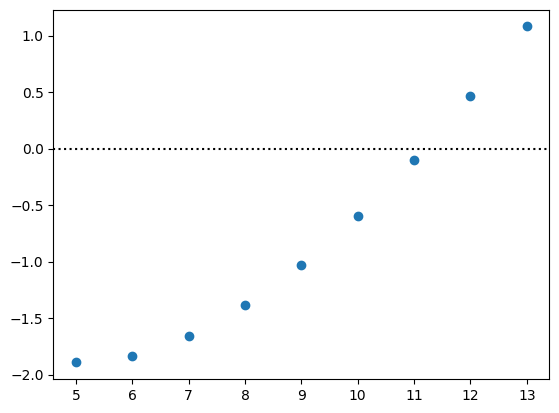

In [48]:
import numpy

def distributeNAroundCircle(N,R=0.5,offset=0):
    points=[]  
    interval = 2*math.pi/N
    for i in range(N):
        thetai = offset+ (i*interval)
        xi = R*math.cos(thetai)
        yi = R*math.sin(thetai)
        points.append([xi,yi])  
    return points



charges_5_circ1 = distributeNAroundCircle(4)
charges_5_circ2 = distributeNAroundCircle(5)

charges_4_circ =  distributeNAroundCircle(4)
center = [0,0]
charges_5_ctr = charges_4_circ
charges_5_ctr.append(center)


#for iq in charges_5_circ2:
    #plt.plot(iq[0],iq[1],'ro')  #'ro' plots as red (r) circles (o)


#plt.xlim(-1.25,+1.25)
#plt.ylim(-1,+1)
#plt.show()

#for iq in charges_5_ctr:
    #plt.plot(iq[0],iq[1],'ro')

#plt.xlim(-1.25,+1.25)
#plt.ylim(-1,+1)
#plt.show()

U5a = calcPotentialEnergy(charges_5_circ)
U5b = calcPotentialEnergy(charges_5_ctr)
#print("U5: 5-circ = ",U5a)
#print("U5: 4-circ, 1 ctr = ",U5b)

X = []
Y = []


for x in range(5, 14):
    charges_5_circ = distributeNAroundCircle(x)
    charges_4_circ =  distributeNAroundCircle(x-1)
    center = [0,0]
    charges_5_ctr = charges_4_circ
    charges_5_ctr.append(center)
    U5a = calcPotentialEnergy(charges_5_circ)
    U5b = calcPotentialEnergy(charges_5_ctr)
    Udiff = (U5a - U5b) 
    #print((str(x),"Ux: circle",U5a))
    #print(str(x),"Ux-1: center = ",U5b)
    print(str(x), "Udiff: ", Udiff)

    X.append(x)
    Y.append(Udiff)


print(X)
print(Y)
#plt.plot(X, Y, "-")
plt.plot(X, Y, "o")
plt.axhline(y = 0, color = '0', linestyle = ':')
plt.show()



5 Udiff2:  -6.0
6 Udiff2:  -5.000000000000007
7 Udiff2:  -2.999999999999993
8 Udiff2:  -2.842170943040401e-14
9 Udiff2:  4.000000000000028
10 Udiff2:  9.000000000000028
11 Udiff2:  15.0
12 Udiff2:  22.000000000000114
13 Udiff2:  30.000000000000057
[5, 6, 7, 8, 9, 10, 11, 12, 13]
[-6.0, -5.000000000000007, -2.999999999999993, -2.842170943040401e-14, 4.000000000000028, 9.000000000000028, 15.0, 22.000000000000114, 30.000000000000057]


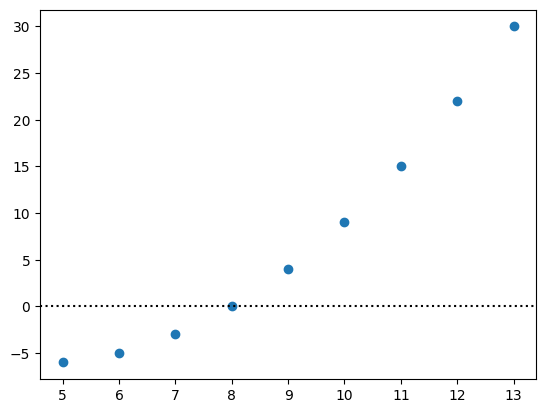

In [49]:

charges_10_circ = distributeNAroundCircle(10)
charges_10_ctr = distributeNAroundCircle(9)
charges_10_ctr.append([0,0])

rn_dipole=2
U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)


X = []
Y = []


for x in range(5, 14):
    charges_10_circ = distributeNAroundCircle(x)
    charges_10_ctr = distributeNAroundCircle(x-1)
    charges_10_ctr.append([0,0])

    rn_dipole=2
    U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
    U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)
    
    Udiff2 = (U10_circ - U10_ctr)

    print(str(x), "Udiff2: ", Udiff2)

    X.append(x)
    Y.append(Udiff2)


print(X)
print(Y)
plt.plot(X, Y, "o")
plt.axhline(y = 0, color = '0', linestyle = ':')
plt.show()



('7', 'Ux: circle', 56.0)
7 Ux-1: center =  58.99999999999999


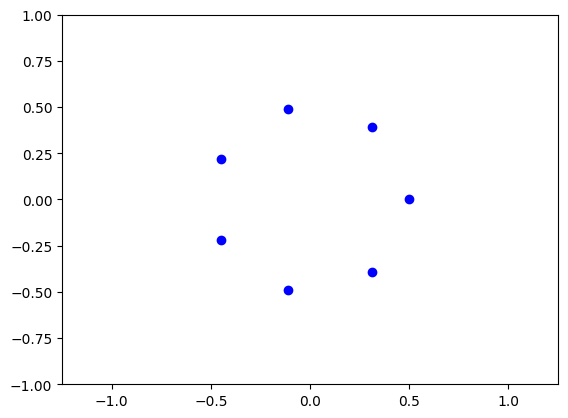

('8', 'Ux: circle', 83.99999999999997)
8 Ux-1: center =  84.0


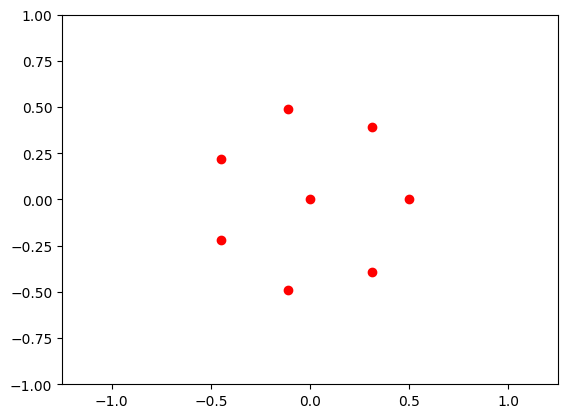

('9', 'Ux: circle', 120.0)
9 Ux-1: center =  115.99999999999997


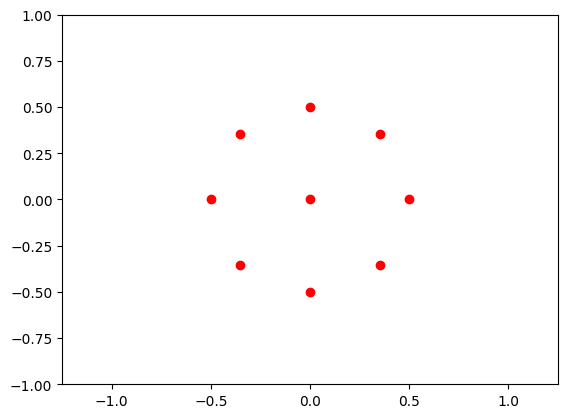

('10', 'Ux: circle', 165.00000000000003)
10 Ux-1: center =  156.0


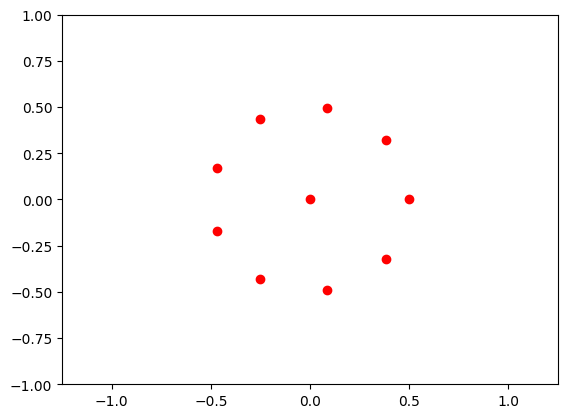

('11', 'Ux: circle', 220.0)
11 Ux-1: center =  205.0


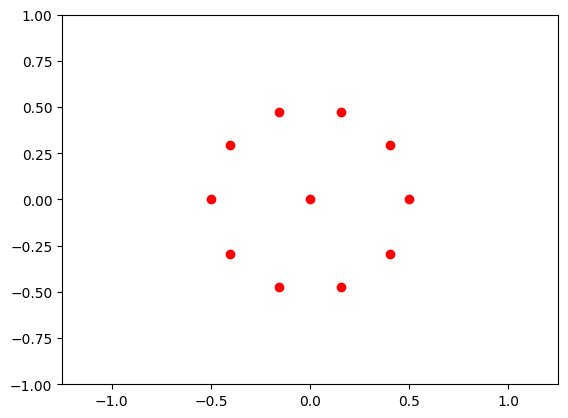

('12', 'Ux: circle', 286.0000000000001)
12 Ux-1: center =  264.0


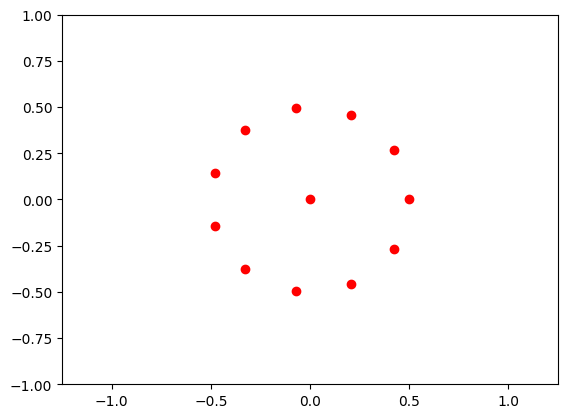

In [87]:

charges_10_circ1 = distributeNAroundCircle(10)
charges_10_ctr1 = distributeNAroundCircle(9)
charges_10_ctr1.append([0,0])

rn_dipole=2
U10_circ1 = calcPotentialEnergy(charges_10_circ,rn_dipole)
U10_ctr1 = calcPotentialEnergy(charges_10_ctr,rn_dipole)






X = []
Y = []

threshold = -0.25

for x in range(7, 13):
    charges_10_circ = distributeNAroundCircle(x)
    charges_10_ctr = distributeNAroundCircle(x-1)
    charges_10_ctr.append([0,0])

    rn_dipole=2
    U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
    U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)
    
    Udiff2 = (U10_circ - U10_ctr)
    print((str(x),"Ux: circle",U10_circ))
    print(str(x),"Ux-1: center = ",U10_ctr)
    #print(str(x), "Udiff2: ", Udiff2)
   
    if Udiff2 >= threshold:
            for iq in charges_10_ctr:
                plt.plot(iq[0], iq[1], 'ro')
    else:
            for iq in charges_10_circ:
                plt.plot(iq[0], iq[1], 'bo')

    plt.xlim(-1.25, 1.25)
    plt.ylim(-1, 1)
    plt.show()




    X.append(x)
    Y.append(Udiff2)



#print(X)
#print(Y)
#plt.plot(X, Y, "o")
#plt.axhline(y = 0, color = '0', linestyle = ':')
#plt.show()



In [82]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import random


def distributeNAroundCircle(N,R=0.5,offset=0):
    points=[]  
    interval = 2*math.pi/N
    for i in range(N):
        thetai = offset+ (i*interval)
        xi = R*math.cos(thetai)
        yi = R*math.sin(thetai)
        points.append([xi,yi])  
    return points


charges_10_circ = distributeNAroundCircle(10)
charges_10_ctr = distributeNAroundCircle(9)
charges_10_ctr.append([0,0])

rn_dipole=2
U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)


X = []
Y = []

#threshold = 0.25

for x in range(20, 24):
    charges_10_circ = distributeNAroundCircle(x)
    charges_10_ctr = distributeNAroundCircle(x-1)
    charges_10_ctr.append([0,0])

    rn_dipole=2
    U10_circ = calcPotentialEnergy(charges_10_circ,rn_dipole)
    U10_ctr = calcPotentialEnergy(charges_10_ctr,rn_dipole)
    
    Udiff2 = (U10_circ - U10_ctr)


    #print((str(x),"Ux: circle",U10_circ))
    #print(str(x),"Ux-1: center = ",U10_ctr)
    print(str(x), "Udiff2: ", Udiff2)

    X.append(x)
    Y.append(Udiff2)

    #if abs(Udiff2) < threshold:



#print(X)
#print(Y)
#plt.plot(X, Y, "o")
#plt.axhline(y = 0, color = '0', linestyle = ':')
plt.show()


# Distance







20 Udiff2:  114.00000000000068
21 Udiff2:  129.99999999999818
22 Udiff2:  147.00000000000068
23 Udiff2:  164.99999999999932
